In [1]:
"""
****************************


*************************************************
Import necessary libraries and packages 
*****************************************************************************
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

In [2]:
"""
*****************************************************************************
Load Data
*****************************************************************************
"""
train_data = pd.read_csv('D:\ML Projects\Loan Predictor\\train.csv')
test_data = pd.read_csv('D:\ML Projects\Loan Predictor\\test.csv')


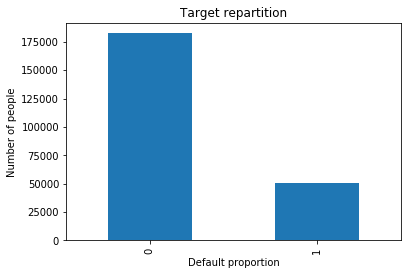

loan_default                           1.000000
ltv                                    0.098208
disbursed_amount                       0.077675
State_ID                               0.048075
VoterID_flag                           0.043747
NO.OF_INQUIRIES                        0.043678
PRI.OVERDUE.ACCTS                      0.040872
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.034462
UniqueID                               0.033848
branch_id                              0.030193
Current_pincode_ID                     0.028419
supplier_id                            0.027357
Employee_code_ID                       0.020657
asset_cost                             0.014261
PAN_flag                               0.002046
SEC.OVERDUE.ACCTS                     -0.001371
SEC.INSTAL.AMT                        -0.001548
SEC.CURRENT.BALANCE                   -0.005531
Driving_flag                          -0.005821
SEC.ACTIVE.ACCTS                      -0.005993
SEC.DISBURSED.AMOUNT                  -0

In [3]:
"""
*****************************************************************************
Analyze the details of Data
*****************************************************************************
"""
fig=plt.figure()
axi=plt.axes()
result = train_data['loan_default']
plt.title('Target repartition')
axi = axi.set(xlabel='Default proportion', ylabel='Number of people')
result.value_counts().plot.bar()
plt.show()

#Correlation Matrix calculation
fac_corr = train_data.corr()
fac_corr['loan_default'].sort_values(ascending = False)


In [4]:
"""
*****************************************************************************
Clean the data
*****************************************************************************

#Remove the outlier records
cols=['disbursed_amount', 'asset_cost', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS','PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT','PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS','SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES']
#For all the numerical columns, if the record has a outlier value then remove that record
updated_td = train_data
for col in cols:
    if (updated_td[col].dtypes !='object'):
        q99=updated_td[col].quantile(0.99)
        q01=updated_td[col].quantile(0.01)
        for i in updated_td.index:
            if (updated_td.loc[i,col]> 5*q99 or updated_td.loc[i,col]< q01/5):
                updated_td=updated_td.drop(index=i)
"""
updated_td = train_data



In [5]:
"""
*****************************************************************************
Analyse the amount of null values present in Data
*****************************************************************************
"""
nan_count = updated_td.isnull().sum()

nan_percentage = (nan_count / len(updated_td))*100

nan_df=pd.concat([nan_percentage], axis=1)
nan_df=nan_df.rename(columns={0:'Percentage'})
nan_df=nan_df[nan_df.Percentage != 0]
nan_df=nan_df.sort_values(by='Percentage',ascending=False)

print(nan_df)


                 Percentage
Employment.Type    3.285811


In [6]:
"""
*****************************************************************************
Convert Date of Birth to age as part of feature engineering
*****************************************************************************
"""
now = pd.Timestamp('now')
updated_td['Date.of.Birth'] = pd.to_datetime(updated_td['Date.of.Birth'], format='%d-%m-%y')
updated_td['Date.of.Birth'] = updated_td['Date.of.Birth'].where(updated_td['Date.of.Birth'] < now, updated_td['Date.of.Birth'] -  np.timedelta64(100, 'Y'))
updated_td['Age'] = (now - updated_td['Date.of.Birth']).astype('<m8[Y]')
updated_td=updated_td.drop('Date.of.Birth',axis=1)
#Drop columns with less correlation factor
col_d = ['UniqueID','MobileNo_Avl_Flag','DisbursalDate','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH','SEC.OVERDUE.ACCTS']
updated_td= updated_td.drop(columns=col_d)

In [7]:
updated_td.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,Age
0,50578,58400,89.55,67,22807,45,1441,Salaried,6,1998,...,0,0,0,0,0,0,0,0,0,37.0
1,47145,65550,73.23,67,22807,45,1502,Self employed,6,1998,...,0,0,0,1991,0,0,1,0,1,35.0
2,53278,61360,89.63,67,22807,45,1497,Self employed,6,1998,...,0,0,0,0,0,0,0,0,0,35.0
3,57513,66113,88.48,67,22807,45,1501,Self employed,6,1998,...,0,0,0,31,0,0,0,1,1,27.0
4,52378,60300,88.39,67,22807,45,1495,Self employed,6,1998,...,0,0,0,0,0,0,0,1,1,43.0


In [8]:
"""
*****************************************************************************
Label Encoding of categorical data
*****************************************************************************
"""
le = LabelEncoder()

for cols in updated_td:
    if updated_td[cols].dtype == 'object':
        if len(list(updated_td[cols].unique())) == 2:
            le.fit(updated_td[cols])
            updated_td[cols] = le.transform(updated_td[cols])


In [9]:
"""
*****************************************************************************
One hot Encoding of categorical data
*****************************************************************************
"""
#Preprocess data with multiple values before one hot encoding
updated_td['PERFORM_CNS.SCORE.DESCRIPTION']= updated_td['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'Not Scored' if 'Not Scored' in str(x) else x )
#one hot encoding
updated_td = pd.get_dummies(updated_td)
updated_td.dtypes.value_counts()


int64      31
uint8      17
float64     2
dtype: int64

In [10]:
"""
*****************************************************************************
Test Train data split
*****************************************************************************
"""
X =updated_td.drop('loan_default',axis=1)
y = updated_td['loan_default']  

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [11]:
print(len(list(updated_td)))

50


In [12]:
"""
*****************************************************************************
Logistic regression model
*****************************************************************************
"""
logisticRegr = LogisticRegression(C=1.0, class_weight=None,fit_intercept=True,max_iter=100)
logisticRegr.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
"""
*****************************************************************************
Logistic regression model accuracy
*****************************************************************************
"""
error = (1 - logisticRegr.score(X_test, y_test))*100
print('Score  = ',logisticRegr.score(X_test, y_test)*100, '%')

Score  =  78.30357270504811 %


In [14]:
"""
*****************************************************************************
Random forest classifier and its accuracy
*****************************************************************************
"""
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=0)
rf.fit(X_train,y_train)
error = (1 - rf.score(X_test, y_test))*100
print('Score  = ',rf.score(X_test, y_test)*100, '%')

Score  =  78.0533832759089 %


In [15]:
"""
*****************************************************************************
Analyse the amount of null values present in test Data
*****************************************************************************
"""
nan_count = test_data.isnull().sum()

nan_percentage = (nan_count / len(test_data))*100

nan_df=pd.concat([nan_percentage], axis=1)
nan_df=nan_df.rename(columns={0:'Percentage'})
nan_df=nan_df[nan_df.Percentage != 0]
nan_df=nan_df.sort_values(by='Percentage',ascending=False)

print(nan_df)

                 Percentage
Employment.Type    3.063385


In [16]:
"""
*****************************************************************************
Convert Date of Birth to age as part of feature engineering
*****************************************************************************
"""
now = pd.Timestamp('now')
test_data['Date.of.Birth'] = pd.to_datetime(test_data['Date.of.Birth'], format='%d-%m-%y')
test_data['Date.of.Birth'] = test_data['Date.of.Birth'].where(test_data['Date.of.Birth'] < now, test_data['Date.of.Birth'] -  np.timedelta64(100, 'Y'))
test_data['Age'] = (now - test_data['Date.of.Birth']).astype('<m8[Y]')
test_data=test_data.drop('Date.of.Birth',axis=1)
#Drop columns with less correlation factor
col_d = ['UniqueID','MobileNo_Avl_Flag','DisbursalDate','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH','SEC.OVERDUE.ACCTS']
test_data= test_data.drop(columns=col_d)

In [17]:
"""
*****************************************************************************
Label Encoding of categorical test data
*****************************************************************************
"""
le = LabelEncoder()

for cols in test_data:
    if test_data[cols].dtype == 'object':
        if len(list(test_data[cols].unique())) == 2:
            le.fit(test_data[cols])
            test_data[cols] = le.transform(test_data[cols])

In [18]:
"""
*****************************************************************************
One hot Encoding of categorical data
*****************************************************************************
"""
#Preprocess data with multiple values before one hot encoding
test_data['PERFORM_CNS.SCORE.DESCRIPTION']= test_data['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'Not Scored' if 'Not Scored' in str(x) else x )
#one hot encoding
test_data = pd.get_dummies(test_data)
test_data.dtypes.value_counts()


int64      30
uint8      17
float64     2
dtype: int64

In [19]:
print(len(list(test_data)))
log_reg_result = test_data
rf_result = test_data

49


In [20]:
"""
*****************************************************************************
Loan Prediction for Test Data with logistic regressor
*****************************************************************************
"""

log_reg_result['loan_default'] = logisticRegr.predict(log_reg_result)
log_reg_result.to_csv('result.csv',mode = 'w', index=False)

In [21]:
"""
*****************************************************************************
Loan Prediction for Test Data with Random forest classifier
*****************************************************************************
"""
rf_result =rf_result.drop('loan_default',axis=1)


rf_result['loan_default'] = rf.predict(rf_result)
rf_result.to_csv('result_rf.csv',mode = 'w', index=False)
